<a href="https://colab.research.google.com/github/Kumasan00/konanzemi/blob/main/changeimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import csv
# 画像ファイルを読み込む
img = Image.open('/content/drive/MyDrive/画像/wallpaper_00291.jpg')
# 画像のピクセルデータを取得
pixels = img.load()
# 画像の幅と高さを取得
width, height = img.size

# RGB値を格納するリストを初期化
#rgb_values = []
# RGB値を列ごと
r_values = []
g_values = []
b_values = []

# 画像の各ピクセルのRGB値をリストに格納
for y in range(height):
  tmp_r = []
  tmp_g = []
  tmp_b = []
  for x in range(width):
    r, g, b = pixels[x, y]
    tmp_r.append(r)
    tmp_g.append(g)
    tmp_b.append(b)
    #rgb_values.append((r, g, b))
  r_values.append(tmp_r)
  g_values.append(tmp_g)
  b_values.append(tmp_b)
# CSVファイルにRGB値を書き込む
with open('/content/drive/MyDrive/画像/image_r.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  for item in r_values:
    writer.writerow(item)
with open('/content/drive/MyDrive/画像/image_g.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  for item in g_values:
    writer.writerow(item)
with open('/content/drive/MyDrive/画像/image_b.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  for item in b_values:
    writer.writerow(item)


width = 680, height = 454


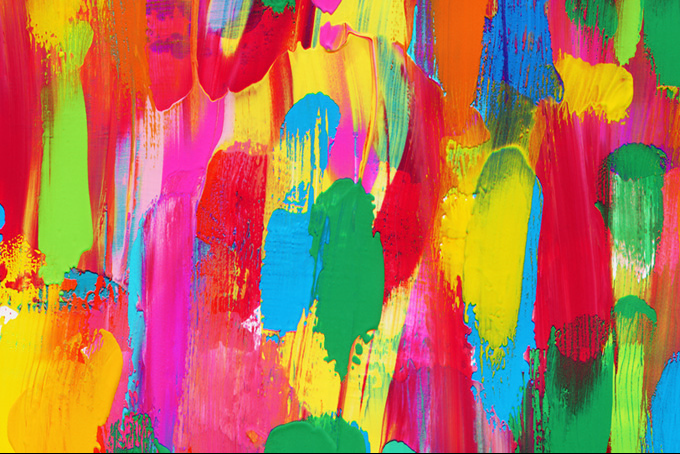

In [ ]:
from PIL import Image
import csv
# CSVファイルからRGB値を読み込む
r_values = []
g_values = []
b_values = []
with open('/content/drive/MyDrive/画像/image_r.csv', newline='') as csvfile:
  reader = csv.reader(csvfile)
  # 行数を数える
  height = sum(1 for row in reader)
  # CSVファイルを開き直す
  csvfile.seek(0)
  # 列数を数える
  width = len(next(reader))
  print(f"width = {width}, height = {height}")
  # 値を取り出す, 一次元で格納([x, y]→ [y * width + x] )
  for row in reader:
    for item in row:
      r_values.append(int(item))
with open('/content/drive/MyDrive/画像/image_g.csv', newline='') as csvfile:
  reader = csv.reader(csvfile)
  for row in reader:
    for item in row:
      g_values.append(int(item))
with open('/content/drive/MyDrive/画像/image_b.csv', newline='') as csvfile:
  reader = csv.reader(csvfile)
  for row in reader:
    for item in row:
      b_values.append(int(item))

# RGB値を元に画像を作成する
new_img = Image.new('RGB', (width, height))
new_pixels = new_img.load()
for y in range(height):
  for x in range(width):
    max = len(r_values)
    if(y * width + x < max):
      new_pixels[x, y] = (r_values[y * width + x], g_values[y * width + x], b_values[y * width + x])#タプル表記(R, G, B)

# 画像を保存する
new_img.save("/content/drive/MyDrive/画像/target_after.jpg")
# 画像を表示する
new_img

In [ ]:
from PIL import Image
import csv
# 画像ファイルを読み込む
img = Image.open('/content/drive/MyDrive/画像/wallpaper_00291.jpg')
# 画像のピクセルデータを取得
pixels = img.load()
# 画像の幅と高さを取得
width, height = img.size
print(width, height)

# RGB値を格納するリストを初期化
#rgb_values = []
# RGB値を列ごと
r_values = []
g_values = []
b_values = []

# 画像の各ピクセルのRGB値をリストに格納
for x in range(width):
  tmp_r = []
  tmp_g = []
  tmp_b = []
  for y in range(height):
    r, g, b = pixels[x, y]
    tmp_r.append(r)
    tmp_g.append(g)
    tmp_b.append(b)
    #rgb_values.append((r, g, b))
  r_values.append(tmp_r)
  g_values.append(tmp_g)
  b_values.append(tmp_b)

# RGB値を元に画像を作成する
new_img = Image.new('RGB', (width, height))
new_pixels = new_img.load()
for y in range(height):
  for x in range(width):
    new_pixels[x, y] = (r_values[x][y], g_values[x][y], b_values[x][y])#タプル表記(R, G, B)
    # new_pixels[x, y] = (r_values[y * width + x],0,0)#タプル表記(R, G, B)

new_img

In [ ]:
def adjustment(num :int) -> int:
  if num <=128:
    return 0
  else:
    return 255

class RGB:
  def __init__(self,r,g,b) -> None:
    self.r = r
    self.g = g
    self.b = b

  def adjustment(self) -> None:
    self.r = adjustment(r)
    self.g = adjustment(g)
    self.b = adjustment(b)

  def RGB_value(self) -> tuple:
    return((self.r,self.g,self.b))

3449 4368


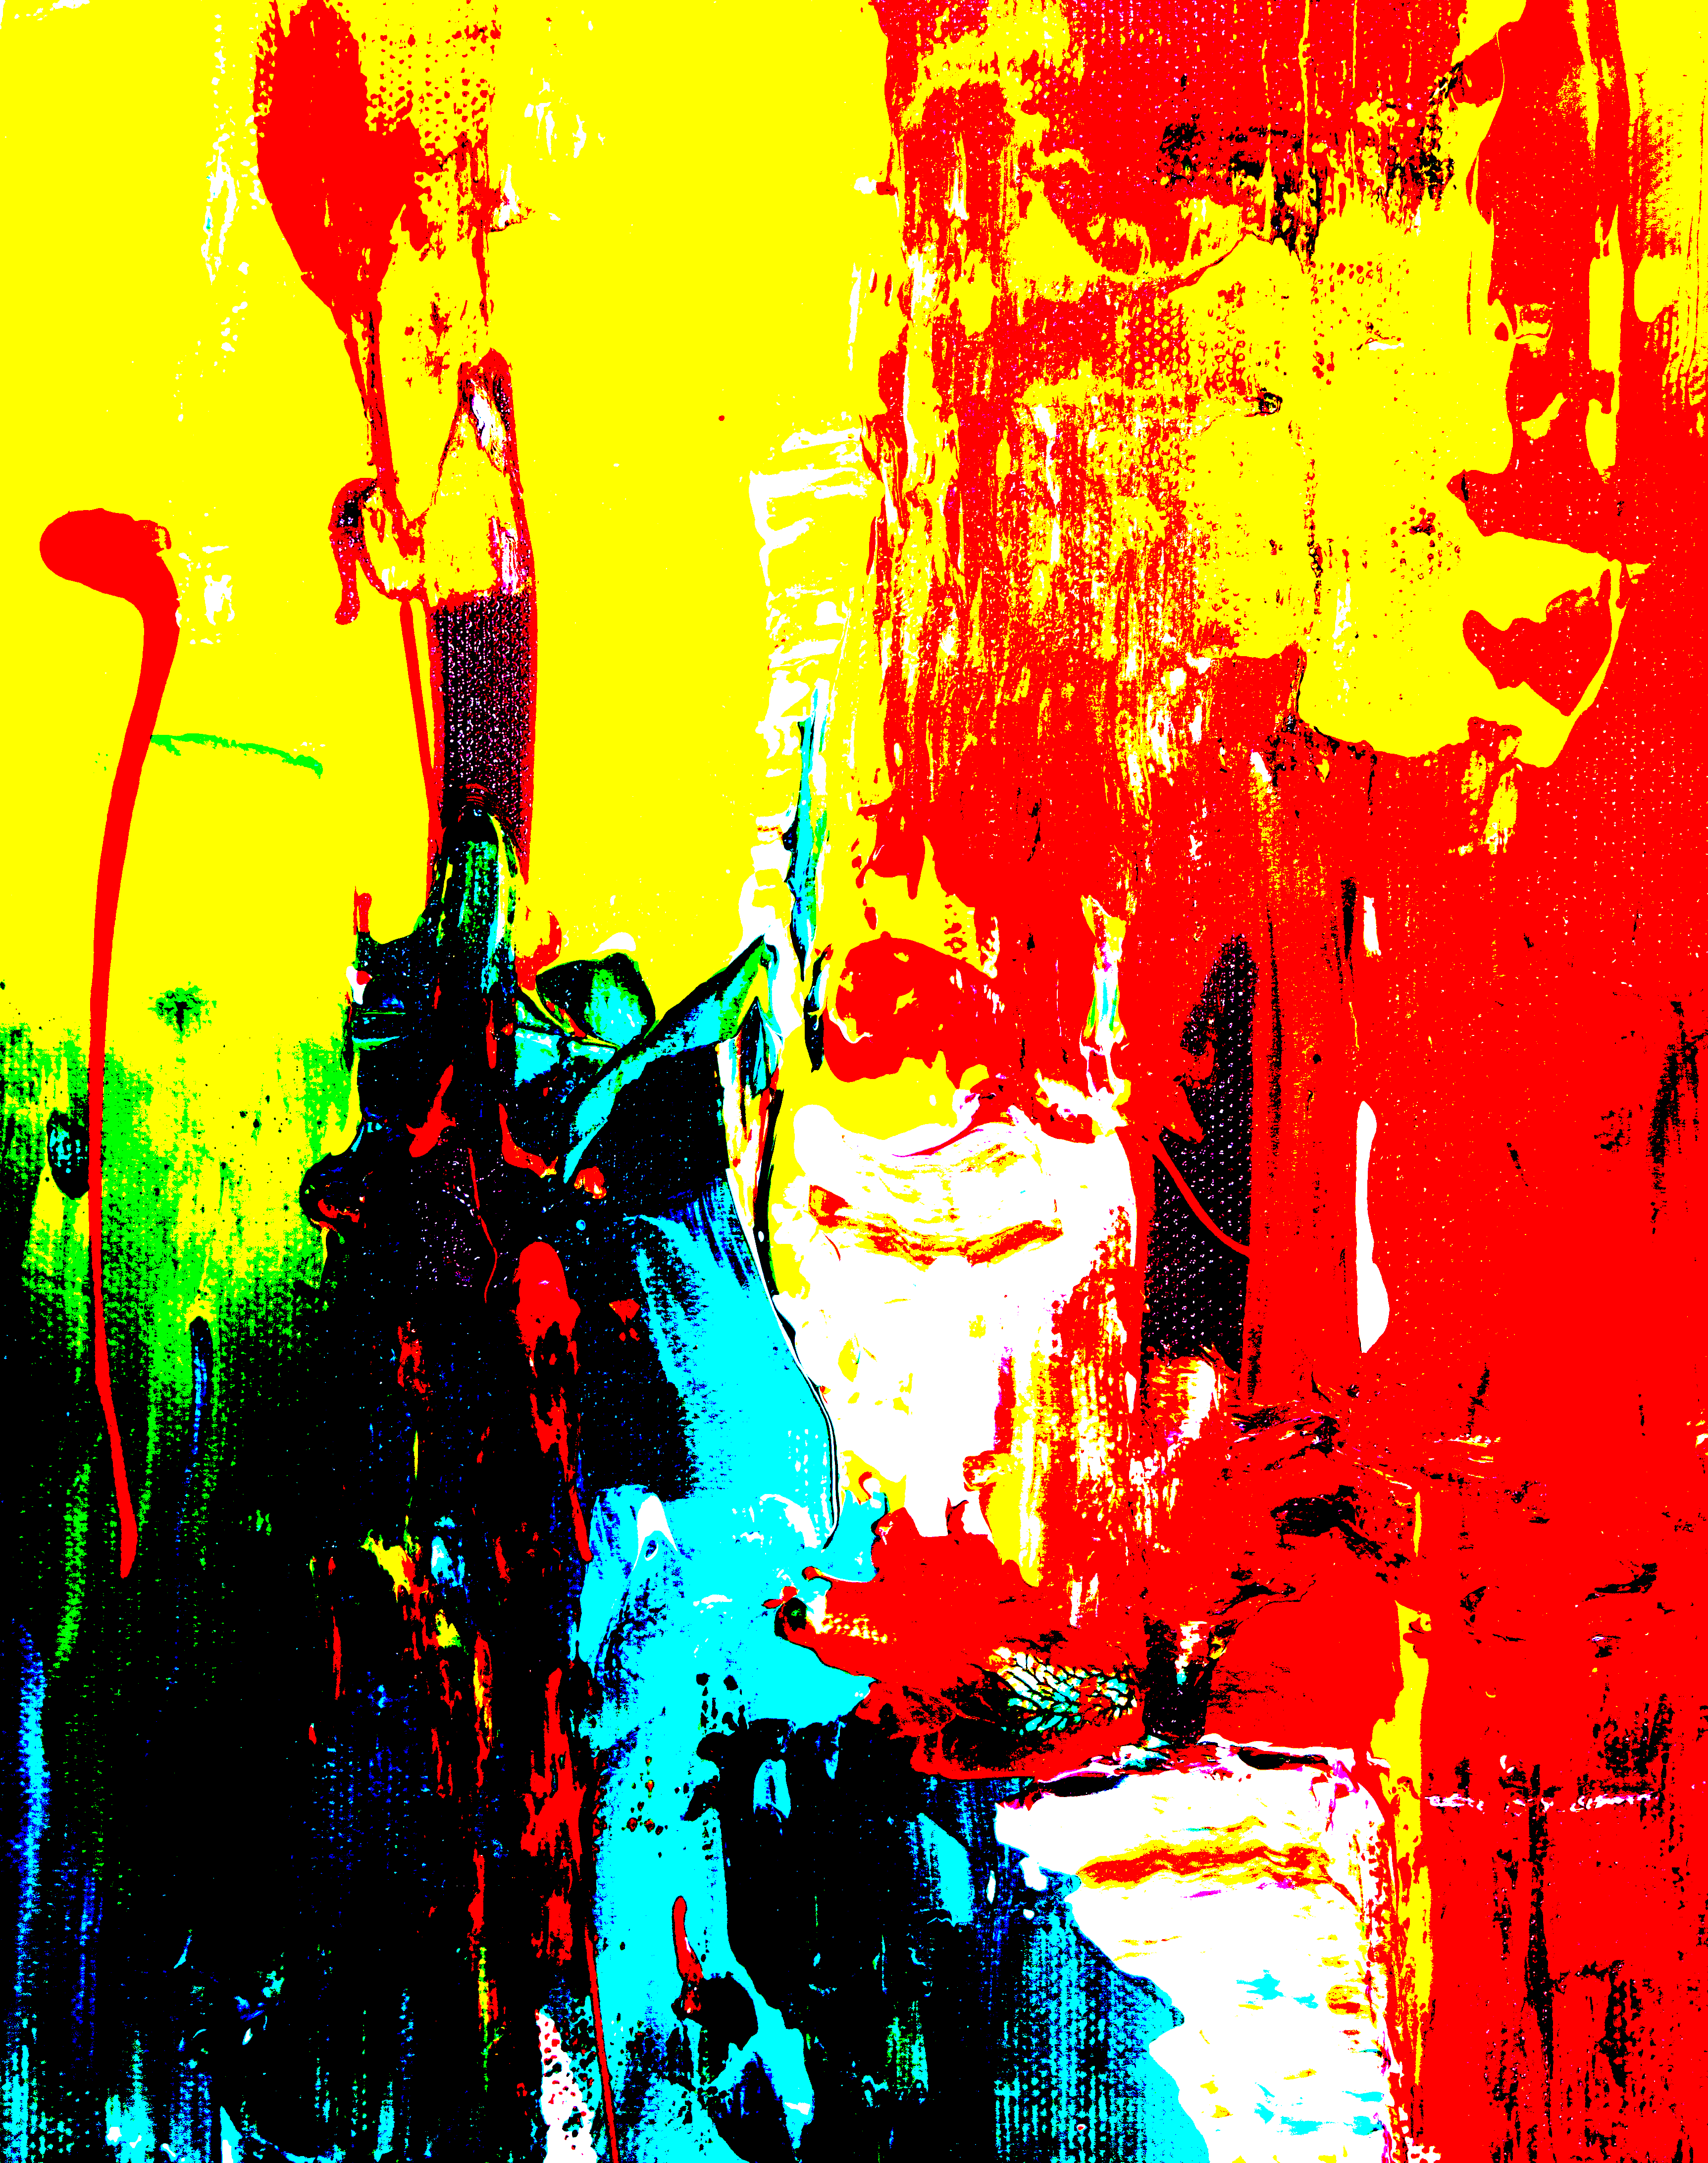

In [ ]:
from PIL import Image
import csv
# 画像ファイルを読み込む
img = Image.open('/content/drive/MyDrive/画像/pexels-steve-1585325.jpg')
# 画像のピクセルデータを取得
pixels = img.load()
# 画像の幅と高さを取得
width, height = img.size
print(width, height)

new_img = Image.new('RGB', (width, height))
new_pixels = new_img.load()

for x in range(width):
  for y in range(height):
    r ,g ,b = pixels[x, y]
    rgb = RGB(r ,g ,b)
    rgb.adjustment()
    new_pixels[x, y] = rgb.RGB_value()

new_img